In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import  assess_goodnes_of_cross_match, rayleigh_plot
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import nway_python_api as nway
set_mpl()
%matplotlib inline

matplotlib settings set


matplotlib settings set
This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py
matplotlib settings set


In [3]:
nway_all = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_all_candidates.gz_pkl', compression='gzip')

nway_best = nway_all.query('nway_match_flag == 1')

nway_all_dist_only = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_dist_only_all_candidates.gz_pkl', compression='gzip')

nway_best_dist_only = nway_all_dist_only.query('nway_match_flag == 1')

In [4]:
nway_all = nway_all.query('DET_LIKE_0>10')
nway_best = nway_best.query('DET_LIKE_0>10')
nway_all_dist_only = nway_all_dist_only.query('DET_LIKE_0>10')
nway_best_dist_only = nway_best_dist_only.query('DET_LIKE_0>10')

# Proximity of matches to eROSITA sources

### all matches

In [5]:
display(pd.DataFrame(nway_best.groupby(['nway_is_closest']).size()))
display(pd.DataFrame(nway_best.groupby(['nway_is_within_pos_r98']).size()))


,0
nway_is_closest,
False,1052
True,5833


,0
nway_is_within_pos_r98,
False,424
True,6461


### correct matches to validation catalog

In [6]:
correct_id = nway_best.query('desi_id == desi_id_true & ~desi_id_true.isna()')
pd.DataFrame(correct_id.groupby(['nway_is_closest', 'nway_is_within_pos_r98']).size())

0
nway_is_closest nway_is_within_pos_r98     
False           False                     2
                True                     42
True            False                     2
                True                    473

### INcorrect matches to validation catalog

In [8]:
incorrect_id = nway_best.query('desi_id != desi_id_true & ~desi_id_true.isna() & desi_id_true!="hostless"')
pd.DataFrame(incorrect_id.groupby(['nway_is_closest', 'nway_is_within_pos_r98']).size())

0
nway_is_closest nway_is_within_pos_r98    
False           True                     8
True            False                    1
                True                    18

# Completeness/purity analysis (including hostless)

Report for paper

In [9]:
pany, Q, Cc, Pc, Ch, Ph, _ = assess_goodnes_of_cross_match(nway_best, p_any_cut=0.1, plot_res=False)
pany_naive, Q_naive, Cc_naive, Pc_naive, Ch_naive, Ph_naive, _ = assess_goodnes_of_cross_match(nway_best_dist_only, p_any_cut=0.2, plot_res=False)

pany_brighthost, Q_brighthost, Cc_brighthost, Pc_brighthost, Ch_brighthost, Ph_brighthost, _ = assess_goodnes_of_cross_match(nway_best.query('`flux_05-20`>1e-14'), p_any_cut=0.2, plot_res=False)

p_any cut: 0.1

                Total validation set: 576
                	 Total hostless: 30
                	 Total not hostless: 546
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 516
                	 Correct not hostless with incorrect ctp: 26
                	 Incorrect not hostless: 8
                Assigned hostless:
                	 Incorrect hostless: 4
                	 Correct hostless: 22

                Overall purity: 0.93
                Not hostless purity: 0.94
                Not hostless completeness: 0.95
                Hostless purity: 0.85
                Hostless completeness: 0.73
            
p_any cut: 0.2

                Total validation set: 576
                	 Total hostless: 30
                	 Total not hostless: 546
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 474
                	 Correct not hostless with incorrect ctp: 65
                	 Inc

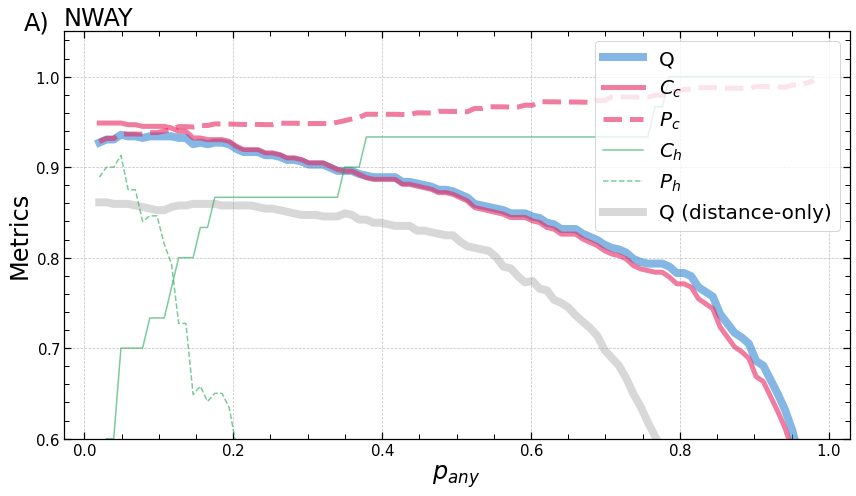

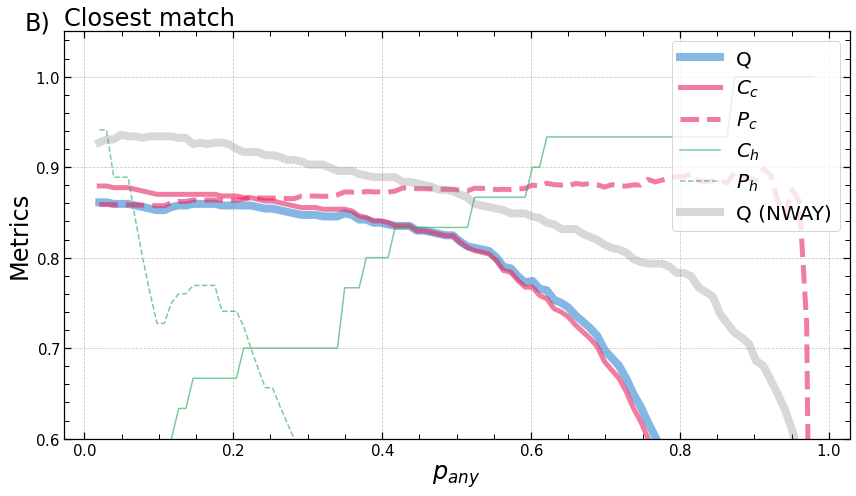

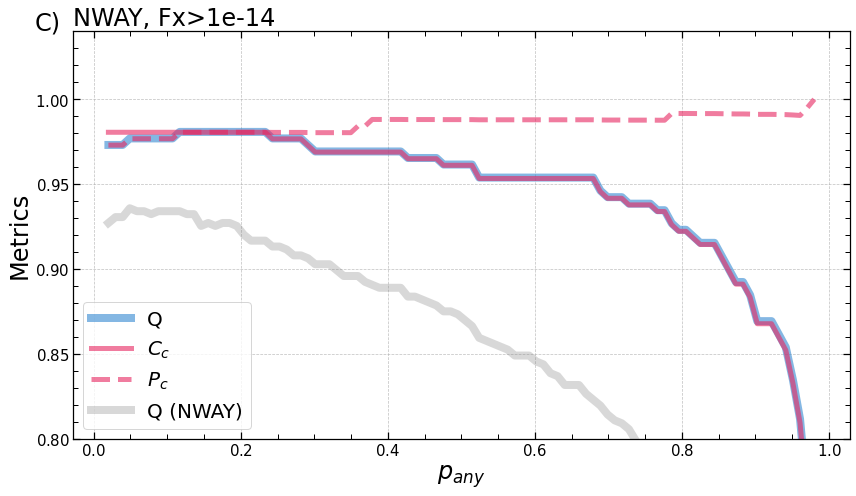

In [10]:
figsizes = (12,7)
fig,  ax =  plt.subplots( figsize = figsizes)

ax.plot(pany, Q, label='Q', color = 'C0', lw = 8, ls = '-', alpha = 0.6)
ax.plot(pany, Cc, label='$C_c$', color = 'C1', lw = 5, ls = '-', alpha = 0.6)
ax.plot(pany, Pc, label='$P_c$', color = 'C1', lw = 5, ls = '--', alpha = 0.6)
ax.plot(pany, Ch, label='$C_h$', color = 'C2', lw = 1.5, ls = '-', alpha = 0.6)
ax.plot(pany, Ph, label='$P_h$', color = 'C2', lw = 1.5, ls = '--', alpha = 0.6)
ax.plot(pany, Q_naive, label='Q (distance-only)', color = 'gray', lw = 8, ls = '-', alpha = 0.3)
ax.text(-0.05, +0.1+0.95, 'A)', transform=ax.transAxes, fontsize=24, verticalalignment='top')

ax.set_ylim(0.6, 1.05)
ax.set_xlabel('$p_{any}$', fontsize = 24)
ax.set_ylabel('Metrics', fontsize = 24)
ax.legend(fontsize = 20, loc = 'upper right')
ax.set_title('NWAY', fontsize = 24)
fig.tight_layout()
plt.savefig(data_path+'/paper_plots/quality_metrics.pdf')



fig,  ax =  plt.subplots( figsize = figsizes)
ax.plot(pany, Q_naive, label='Q', color = 'C0', lw = 8, ls = '-', alpha = 0.6)
ax.plot(pany, Cc_naive, label='$C_c$', color = 'C1', lw = 5, ls = '-', alpha = 0.6)
ax.plot(pany, Pc_naive, label='$P_c$', color = 'C1', lw = 5, ls = '--', alpha = 0.6)
ax.plot(pany, Ch_naive, label='$C_h$', color = 'C2', lw = 1.5, ls = '-', alpha = 0.6)
ax.plot(pany, Ph_naive, label='$P_h$', color = 'C2', lw = 1.5, ls = '--', alpha = 0.6)
ax.plot(pany, Q, label='Q (NWAY)', color = 'gray', lw = 8, ls = '-', alpha = 0.3)
ax.text(-0.05, +0.1+0.95, 'B)', transform=ax.transAxes, fontsize=24, verticalalignment='top')


ax.set_ylim(0.6, 1.05)
ax.set_xlabel('$p_{any}$', fontsize = 24)
ax.set_ylabel('Metrics', fontsize = 24)
ax.legend(fontsize = 20, loc = 'upper right')
ax.set_title('Closest match', fontsize = 24)
fig.tight_layout()
plt.savefig(data_path+'/paper_plots/quality_metrics_naive.pdf')




fig,  ax =  plt.subplots( figsize = figsizes)
ax.plot(pany, Q_brighthost, label='Q', color = 'C0', lw = 8, ls = '-', alpha = 0.6)
ax.plot(pany, Cc_brighthost, label='$C_c$', color = 'C1', lw = 5, ls = '-', alpha = 0.6)
ax.plot(pany, Pc_brighthost, label='$P_c$', color = 'C1', lw = 5, ls = '--', alpha = 0.6)
ax.plot(pany, Q, label='Q (NWAY)', color = 'gray', lw = 8, ls = '-', alpha = 0.3)
ax.text(-0.05, +0.1+0.95, 'C)', transform=ax.transAxes, fontsize=24, verticalalignment='top')

ax.set_ylim(0.8, 1.04)
ax.set_xlabel('$p_{any}$', fontsize = 24)
ax.set_ylabel('Metrics', fontsize = 24)
ax.legend(fontsize = 20)
ax.set_title('NWAY, Fx>1e-14', fontsize = 24)
fig.tight_layout()
plt.savefig(data_path+'/paper_plots/quality_metrics_bright.pdf')



### drop a fraction of 'hostless' validation

the motivation is that we do not know the true fraction of hostles

 Completeness = 94% 
 Purity = 94% 
 nway_prob_has_match optimal cutoff =  0.12 
 Fraction of sources with prob_has_match > 0.12 = 96%


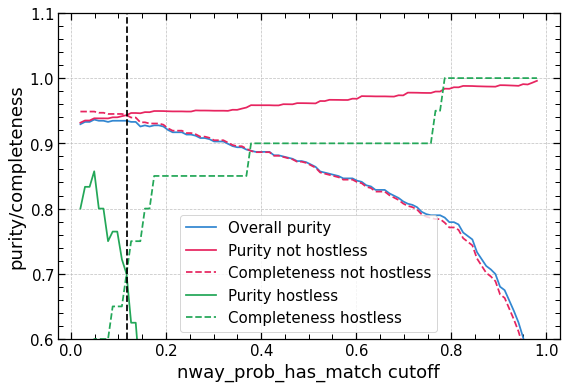

p_any cut: 0.1

                Total validation set: 566
                	 Total hostless: 20
                	 Total not hostless: 546
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 516
                	 Correct not hostless with incorrect ctp: 26
                	 Incorrect not hostless: 7
                Assigned hostless:
                	 Incorrect hostless: 4
                	 Correct hostless: 13

                Overall purity: 0.93
                Not hostless purity: 0.94
                Not hostless completeness: 0.95
                Hostless purity: 0.76
                Hostless completeness: 0.65
            


In [13]:
n_not_hostless = 546
n_hostless = 20
df_not_hostless = nway_best.query('desi_id_true!="hostless" & ~desi_id_true.isna()').sample(n_not_hostless)
df_hostless = nway_best.query('desi_id_true=="hostless" & ~desi_id_true.isna() ').sample(n_hostless)

df_check = pd.concat([df_not_hostless, df_hostless])

_ = assess_goodnes_of_cross_match(df_check, p_any_cut=0.1)


# Distribution of `p_any`

In [14]:
df_tmp = nway_best.query('~desi_id_true.isna() & desi_id_true=="hostless" & DET_LIKE_0>15')[['srcname_fin', 'RA_fin', 'DEC_fin', 'DET_LIKE_0']]
df_tmp.to_csv(data_path+'hostless_candidates.csv', index=False)

<AxesSubplot:xlabel='nway_prob_has_match', ylabel='Count'>

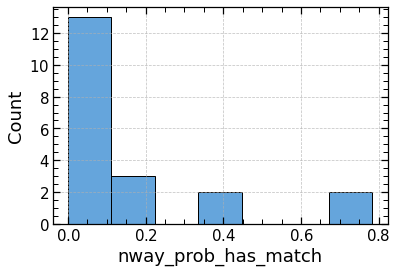

In [15]:

sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true=="hostless" & DET_LIKE_0>15').nway_prob_has_match, label = 'val hostless')


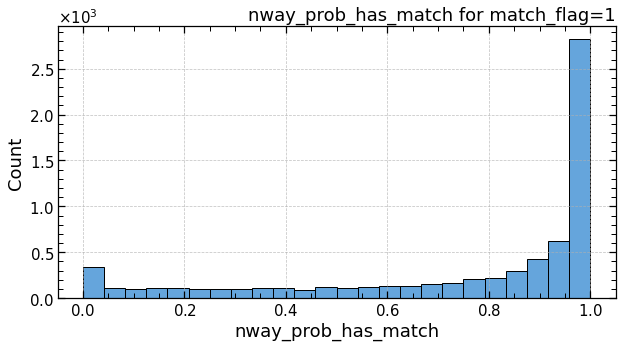

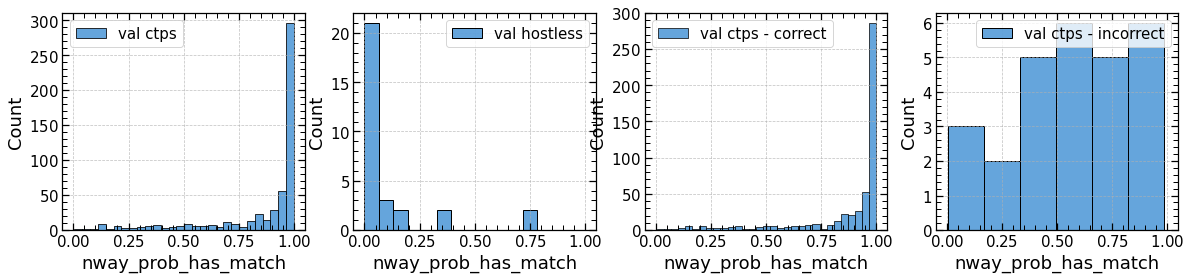

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(nway_best.nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1', loc = 'right')


fig, axs =  plt.subplots(nrows=1, ncols = 4, sharex = True, gridspec_kw = {'hspace':0, 'height_ratios': None}, figsize = (20,4))


sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true!="hostless"').nway_prob_has_match, ax = axs[0], label = 'val ctps')
axs[0].legend()


sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true=="hostless"').nway_prob_has_match, ax = axs[1], label = 'val hostless')
axs[1].legend()


sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true==desi_id & desi_id_true!="hostless"').nway_prob_has_match, ax = axs[2], label = 'val ctps - correct')
axs[2].legend()

sns.histplot(nway_best.query('~desi_id_true.isna() & desi_id_true!=desi_id & desi_id_true!="hostless"').nway_prob_has_match, ax = axs[3], label = 'val ctps - incorrect')
axs[3].legend()

Text(1.0, 1.0, 'nway_prob_has_match for match_flag=1 and DET_LIKE>15')

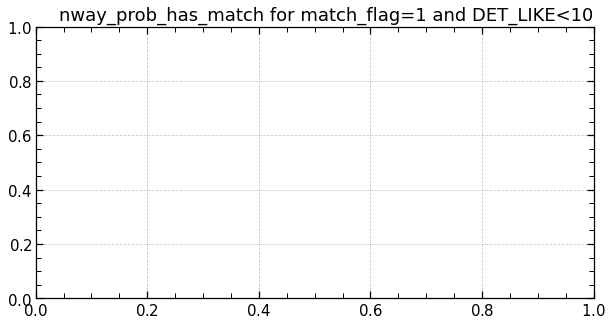

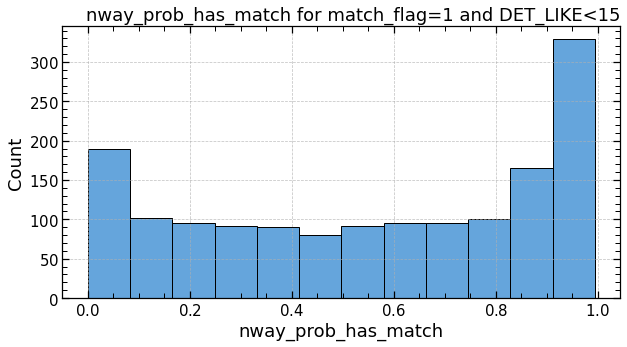

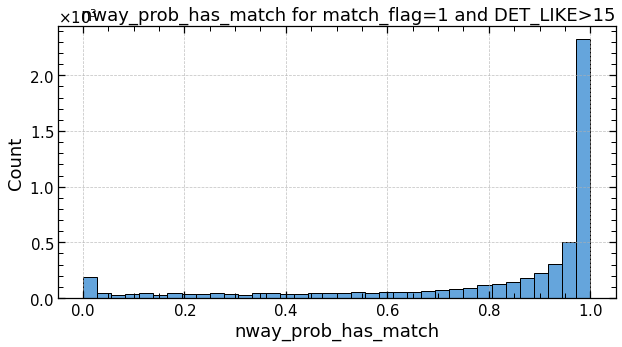

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(nway_best.query('DET_LIKE_0<10').nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1 and DET_LIKE<10', loc = 'right')

plt.figure(figsize=(10,5))
sns.histplot(nway_best.query('DET_LIKE_0<15').nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1 and DET_LIKE<15', loc = 'right')
plt.figure(figsize=(10,5))
sns.histplot(nway_best.query('DET_LIKE_0>15').nway_prob_has_match)
plt.title('nway_prob_has_match for match_flag=1 and DET_LIKE>15', loc = 'right')


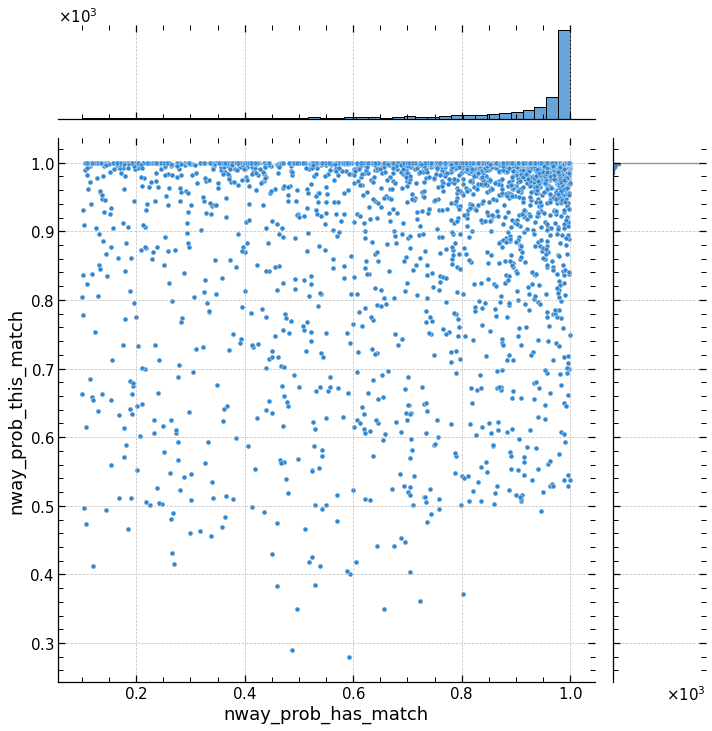

In [19]:
sns.jointplot(data = nway_best.query('nway_prob_has_match>0.1 & DET_LIKE_0>15'), x = 'nway_prob_has_match', y = 'nway_prob_this_match', height = 10)


# Proportion of hostless?

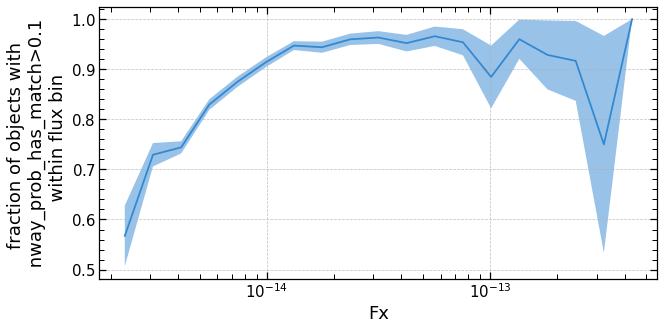

In [20]:
fluxes = np.geomspace(2e-15, 5e-13, 20)
pcut = 0.3
fracs = []
fracs_err = []
for i in range(len(fluxes)-1):
    flux_bin_lo = fluxes[i]
    flux_bin_hi = fluxes[i+1]
    dt_tmp_all = nway_best.query('`flux_05-20`>@flux_bin_lo & `flux_05-20`<@flux_bin_hi')
    dt_tmp_pcut = dt_tmp_all.query('nway_prob_has_match>@pcut')
    #dt_tmp_all = nway_best.query('`flux_05-20`>@flux')
    #dt_tmp_pcut = dt_tmp_all.query('nway_prob_has_match>@pcut')
    n_all = len(dt_tmp_all)
    n_pcut = len(dt_tmp_pcut)
    frac = n_pcut/n_all
    frac_err = np.sqrt(frac*(1-frac)/n_all)
    fracs.append(frac)
    fracs_err.append(frac_err)

fracs = np.array(fracs)
fracs_err = np.array(fracs_err)
plt.figure(figsize=(10,5))
flux_axis = np.sqrt(fluxes[:-1]*fluxes[1:])
plt.semilogx(flux_axis, fracs)
plt.fill_between(flux_axis, fracs-fracs_err, fracs+fracs_err, alpha = 0.5)
plt.xlabel('Fx')
plt.ylabel('fraction of objects with \n nway_prob_has_match>0.1 \n  within flux bin')


#x = [3.1837806e-15, 4.3118590e-15, 5.9137473e-15, 8.2848220e-15,
  #     1.1705587e-14, 1.6532343e-14, 2.4239816e-14, 3.6161600e-14,
  #     5.1031082e-14, 7.3995816e-14]

#y = [0.76380954, 0.83966348, 0.91590677, 0.9999546 , 0.99994036,
 #      0.9999546 , 0.9999546 , 0.9999546 , 0.9999546 , 0.9999546 ]

#plt.plot(np.array(x),np.array(y))

plt.show()

# Offset between secure DESI matches and eROSITA sources

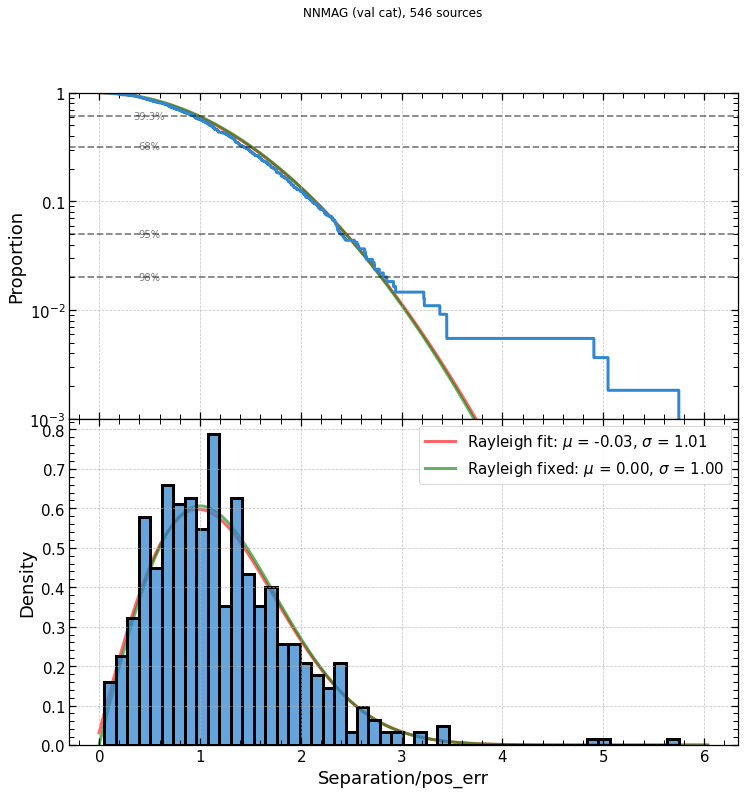

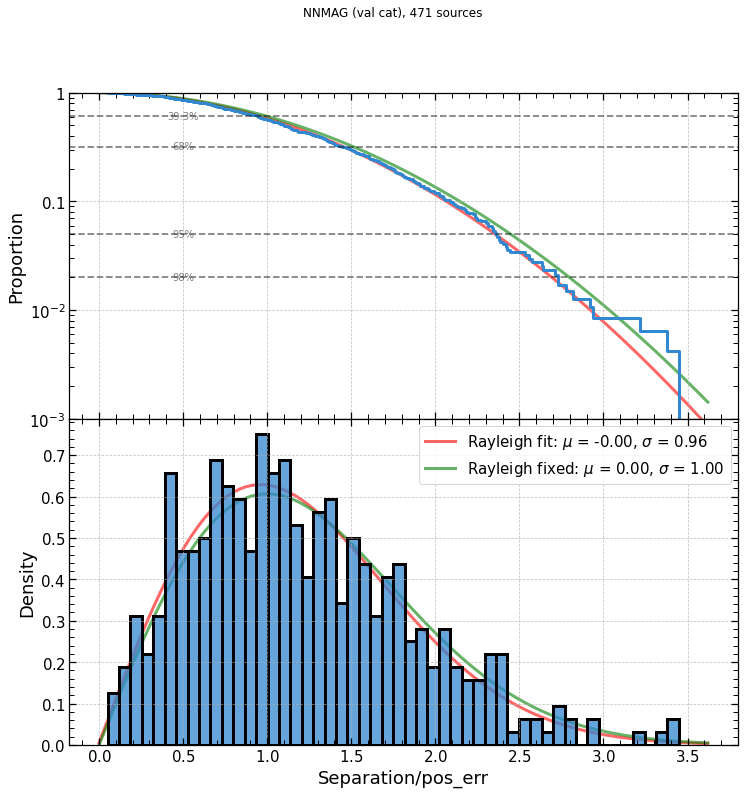

In [21]:

rayleigh_plot(nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless"'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='NNMAG (val cat)')


rayleigh_plot(nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless" & DET_LIKE_0>15'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='NNMAG (val cat)')


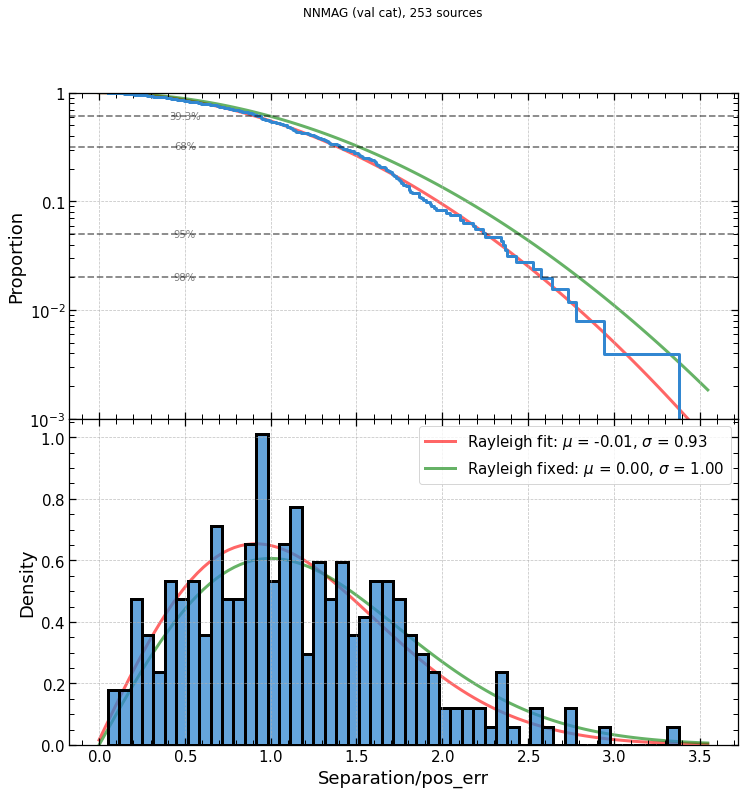

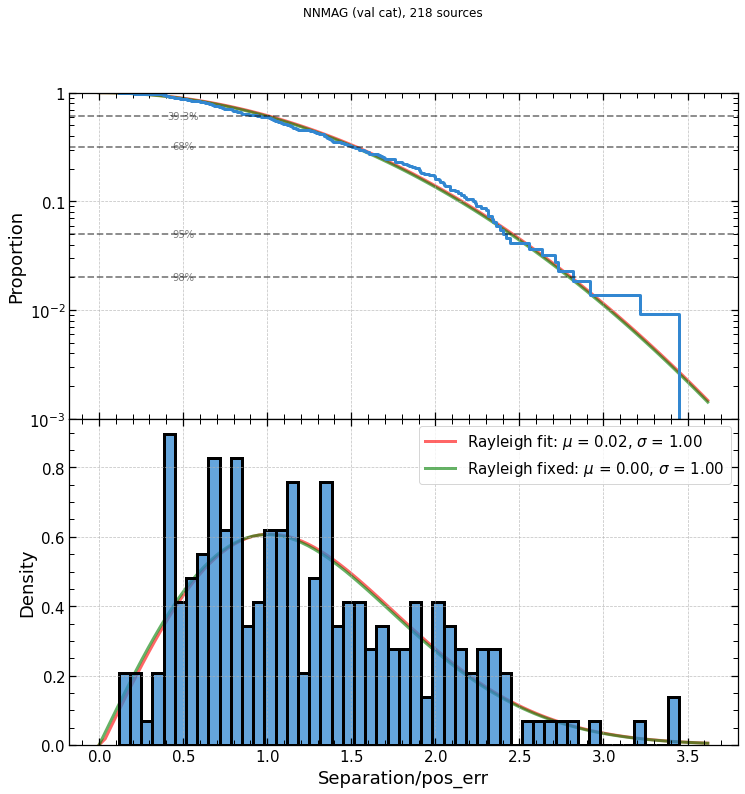

In [22]:
rayleigh_plot(nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless" & `flux_05-20`>1e-14 & DET_LIKE_0>15'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='NNMAG (val cat)')

rayleigh_plot(nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless" & `flux_05-20`<1e-14 & DET_LIKE_0>15'), sep_col='nway_Separation_EROSITA_DESI', pos_err_col = 'pos_sigma_2d', plotlabel='NNMAG (val cat)')

plot for paper

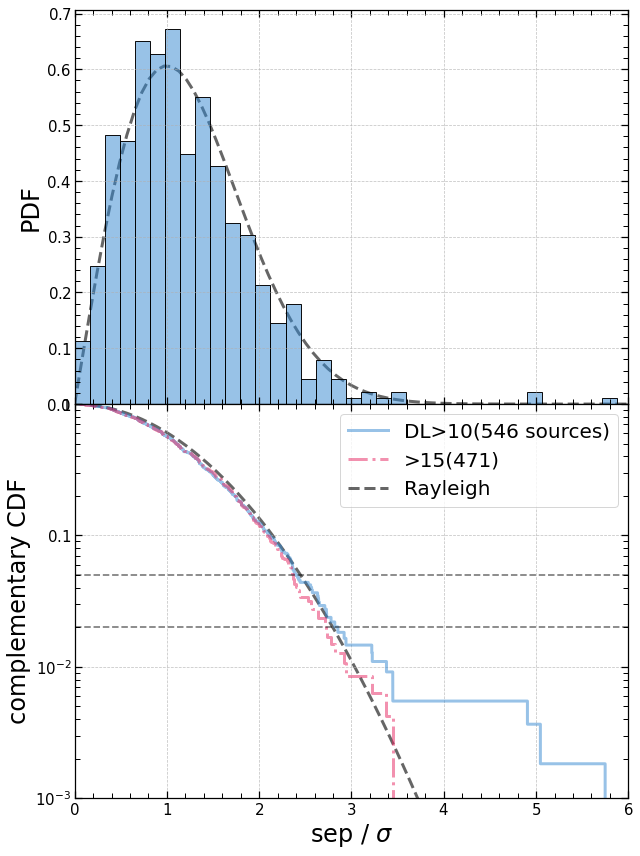

In [23]:
from scipy import stats

df1 = nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless" & DET_LIKE_0>10')
df2 = nway_all.query('~desi_id_true.isna() &  desi_id==desi_id_true & desi_id_true!="hostless" & DET_LIKE_0>15')
n1 = len(df1)
n2 = len(df2)

rat1 = df1['nway_Separation_EROSITA_DESI']/df1['pos_sigma_2d']
rat2 = df2['nway_Separation_EROSITA_DESI']/df2['pos_sigma_2d']

rayleigh_fit_1 = stats.rayleigh.fit(rat1)
rayleigh_fit_2 = stats.rayleigh.fit(rat2)


fig, axs =  plt.subplots(nrows=2, ncols = 1, sharex = True, gridspec_kw = {'hspace':0, 'height_ratios': None}, figsize = (9,12))
ax1, ax2 = axs

bins = np.linspace(0, 8, 50)
x = np.linspace(0, 8, 100)

for color, rats, labels, style in zip(['C0', 'C1'], [rat1, rat2], ['DL>10'+f"({n1} sources)", '>15'+f"({n2})"], ['-', '-.']):
    if color == 'C0':
        sns.histplot(rats, ax = ax1, color = color, label = labels, alpha = 0.5, stat = 'density', bins = bins)
        #sns.kdeplot(rats, ax = ax1, color = color, label = labels, alpha = 0.5)
    sns.ecdfplot(rats, ax = ax2, color = color, label = labels, complementary = True, lw = 3, alpha = 0.5, linestyle = style)

ax2.plot(x, 1-stats.rayleigh.cdf(x, 0,1), '--', color = 'k', lw=3, alpha=0.6, label='Rayleigh', zorder = -1)
ax1.plot(x, stats.rayleigh.pdf(x, 0,1), '--', color = 'k', lw=3, alpha=0.6, label='Rayleigh', zorder = -1)



for prob in [95, 98]:
    ax2.axhline(1 - prob/100, color = 'k', ls = '--', alpha = 0.5)
    #ax2.text(7, 1 - prob/100, f'{prob}%', ha = 'center', va = 'center', color = 'k', alpha = 0.5, fontsize = 20)

ax2.set_yscale('log')
ax2.set_ylim(1e-3, 1)
ax2.set_xlim(0, 6)
ax2.set_xlabel('sep / $\sigma$', fontsize = 24)
ax2.set_ylabel('complementary CDF', fontsize = 24)
ax1.set_ylabel('PDF', fontsize = 24)
ax2.legend(fontsize = 20)
fig.tight_layout()
plt.savefig(data_path+'/paper_plots/pos_err.pdf')


# Distribution of nnmags

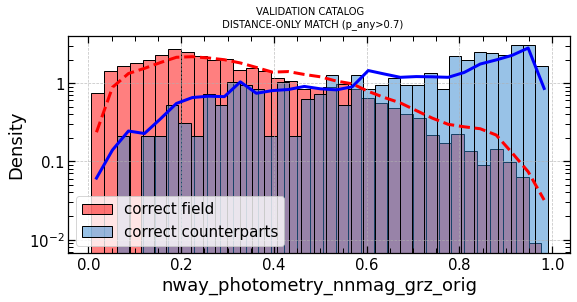

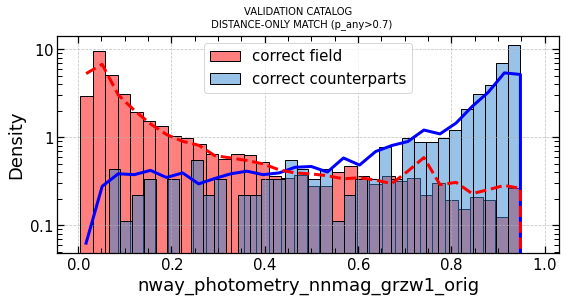

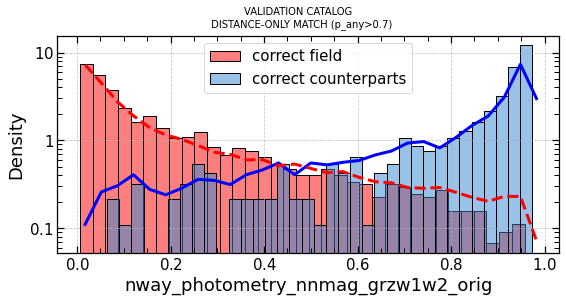

In [24]:
for prior_type in ['grz_orig', 'grzw1_orig', 'grzw1w2_orig']:

    colname = 'nway_photometry_nnmag_'+prior_type
    prob_cutoff = 0.7
    plt.figure(figsize=(9,4))

    sns.histplot(nway_all_dist_only.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==0 & {colname}!=-99. & ~desi_id_true.isnull()")[colname], stat = 'density', color = 'r', bins = 35, label = 'correct field', alpha = 0.5)

    sns.histplot(nway_all_dist_only.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==1 & {colname}!=-99. & desi_id==desi_id_true")[colname], stat = 'density', bins = 35, label = 'correct counterparts', alpha = 0.5)
    plt.suptitle(f'VALIDATION CATALOG \n DISTANCE-ONLY MATCH (p_any>{prob_cutoff})', fontsize = 10)
    plt.yscale('log')
    plt.legend()

    nnmag_name = prior_type.split('_')[0]
    model_hist = pd.read_csv(f"/Users/sdbykov/work/lockman_hole/1_desi-photo-prior/model/nnmag_{nnmag_name}.csv", sep = '\t')
    lo,hi,ctps, field = model_hist['#lo'], model_hist['hi'], model_hist['selected'], model_hist['others']

    plt.plot((lo+hi)/2, ctps, 'b-', lw = 3)
    plt.plot((lo+hi)/2, field, 'r--', lw = 3)

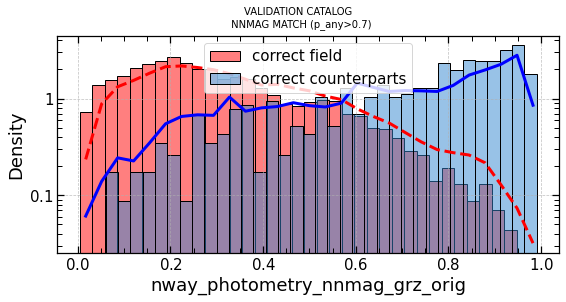

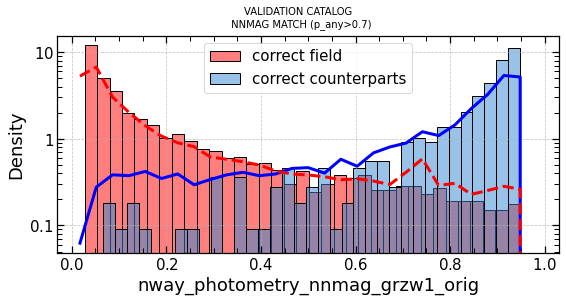

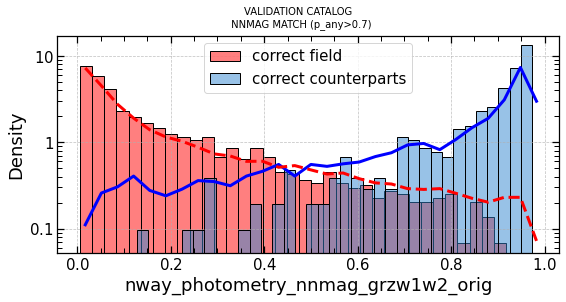

In [25]:
for prior_type in ['grz_orig', 'grzw1_orig', 'grzw1w2_orig']:


    colname = 'nway_photometry_nnmag_'+prior_type
    prob_cutoff = 0.7
    plt.figure(figsize=(9,4))

    sns.histplot(nway_all.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==0 & {colname}!=-99. & ~desi_id_true.isnull()")[colname], stat = 'density', color = 'r', bins = 35, label = 'correct field', alpha = 0.5)

    sns.histplot(nway_all.query(f"nway_prob_has_match>@prob_cutoff & nway_match_flag==1 & {colname}!=-99. & desi_id==desi_id_true")[colname], stat = 'density', bins = 35, label = 'correct counterparts', alpha = 0.5)
    plt.suptitle(f'VALIDATION CATALOG \n NNMAG MATCH (p_any>{prob_cutoff})', fontsize = 10)
    plt.yscale('log')
    plt.legend()

    nnmag_name = prior_type.split('_')[0]
    model_hist = pd.read_csv(f"/Users/sdbykov/work/lockman_hole/1_desi-photo-prior/model/nnmag_{nnmag_name}.csv", sep = '\t')
    lo,hi,ctps, field = model_hist['#lo'], model_hist['hi'], model_hist['selected'], model_hist['others']

    plt.plot((lo+hi)/2, ctps, 'b-', lw = 3)
    plt.plot((lo+hi)/2, field, 'r--', lw = 3)

# Missing data

fraction of missed measurements per filter, in per cent - All candidates within 30":
desi_rel_dered_mag_g     17.3
desi_rel_dered_mag_r     11.4
desi_rel_dered_mag_z      6.6
desi_rel_dered_mag_w1    33.6
desi_rel_dered_mag_w2    55.2
desi_rel_dered_mag_w3    92.5
desi_rel_dered_mag_w4    88.1
dtype: float64
fraction of missed measurements per filter, in per cent - best matches:
desi_rel_dered_mag_g      5.3
desi_rel_dered_mag_r      3.7
desi_rel_dered_mag_z      1.5
desi_rel_dered_mag_w1     4.7
desi_rel_dered_mag_w2     8.2
desi_rel_dered_mag_w3    68.6
desi_rel_dered_mag_w4    79.6
dtype: float64
fraction of missed measurements per filter, in per cent - best matches within r98
desi_rel_dered_mag_g      4.9
desi_rel_dered_mag_r      3.3
desi_rel_dered_mag_z      1.3
desi_rel_dered_mag_w1     4.0
desi_rel_dered_mag_w2     6.9
desi_rel_dered_mag_w3    68.0
desi_rel_dered_mag_w4    79.1
dtype: float64
best-matches sources with all grz missing:  16


<AxesSubplot:>

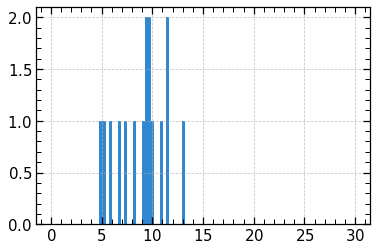

In [26]:
cols = ['desi_rel_dered_mag_g', 'desi_rel_dered_mag_r', 'desi_rel_dered_mag_z', 'desi_rel_dered_mag_w1', 'desi_rel_dered_mag_w2', 'desi_rel_dered_mag_w3', 'desi_rel_dered_mag_w4']
print('fraction of missed measurements per filter, in per cent - All candidates within 30":')
print(nway_all[cols].agg(lambda x: np.round(100*np.mean(np.isnan(x)),1)))
print('fraction of missed measurements per filter, in per cent - best matches:')
print(nway_best[cols].agg(lambda x: np.round(100*np.mean(np.isnan(x)),1)))

print('fraction of missed measurements per filter, in per cent - best matches within r98')
print(nway_best.query('nway_Separation_EROSITA_DESI<pos_r98 ')[cols].agg(lambda x: np.round(100*np.mean(np.isnan(x)),1)))



n_grz_missing_best_matches = len(nway_best.query('desi_rel_dered_mag_g.isna() & desi_rel_dered_mag_r.isna() & desi_rel_dered_mag_z.isna()'))
print('best-matches sources with all grz missing: ', n_grz_missing_best_matches)

nway_best.query('desi_rel_dered_mag_g.isna() & desi_rel_dered_mag_r.isna() & desi_rel_dered_mag_z.isna()').desi_dered_mag_g.hist(bins=100, range=(0, 30), label='g missing')